<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 (2) <br>

Quantitative performance estimation method for model performance degradation due to concept drift

## Laos project!!!

# 1. Abstract

* 기계학습을 통해 학습된 모델은 업무 활용 시 그 성능을 실측하기 매우 어렵다 . 때문에 운영 부서에서는 모델의 성능을 효과적으로 관리하지 못한다. 이로 인해 모델의 상태를 판단하기 위한 Concept drift 탐지 방법이 다양하게 연구되고 있다 .
* 운영 부서에서는 운영 중인 모델의 성능을 정량적으로 관리하려고 한다 . 그러나 Concept drift 는 모델 상태를 데이터 관계적으로 판단 할 뿐 , 모델의 정량적 성능 수치를 추정하지는 못 한다.
* 본 연구에서는 Concept drift 의 통계량을 통해 정량적으로 precision 값을 추정하
는 성능 예측 모델을 제안한다.
* 제안 모델은 정답 라벨을 포함하는 테스트데이터셋에서 정답을 맞춘 데이터와 틀린데이터의 비율을 임의 조정한 샘플데이터셋을 복수 생성하고 각 데이터셋의 Drift 통계량과 성능의 관계를 학습한다. 이후 실제 유입되는 데이터셋의 Drift 통계량을 측정하고 이를 제안 모델에 대입하여 성능을 추정한다.
* Drift 를 임의 주입한 가상데이터셋을 통해 학습한 가상 비즈니스 모델에 적용하여 제안 모델의 적합성을 확인하고 현실 비즈니스에서 사용될 수 있는 대출 심사 모델과 신용카드 오사용 탐지 모델 을 통해 제안 모델의 성능 예측 유효성을 확인한다.












# 2. 이론적 배경

* LaTex  :https://deep.chulgil.me/ibmunjareul-wihan-gico/ 
* https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

* Trainset으로 모델을 학습한 이후, 시간이 경과하면, live data는 어떠한 사회, 문화, 환경적 요인에 의해 그 특성과 분포가 변화하게 된다.
* 이때문에 학습 시점의 모델 성능을 유지할 수 없게된다.
* 학습이후 이러한 현상은 Data Drift, Concept Drift로 설명할 수 있으나, 이를 학습시점의 상황으로 보면, Trainset과 Testset의 Distribution이 상이한 Covariate shift (Geeta Dharani. Y; Nimisha G Nair; Pallavi Satpathy; Jabez Christopher "Covariate Shift: A Review and Analysis on Classifiers", 2019 Global Conference for Advancement in Technology (GCAT))의 상황으로 설명할 수 있다.
* 따라서, Covariate Shift 상황의 학습 방법에 대한 연구들을 통해, 모델 성능 추정 방법을 도출하고자 한다.

* covariate shift의 문제에서 먼저, Trainset을 다음과 같이 정의한다.  
$$
X_L = \{x_1, . . . , x_m\}, Y_L = \{y_1, . . . , y_m\}
\tag{1}
$$
이때 x의 distribution, 즉 trainset의 distribution을 p(x|λ) 이라 한다.
* 이제, covariate shift 상황의 Testset을 다음과 같이 정의한다.
$$ 
X_T = \{x_{m+1}, . . . , x_{m+n}\}, Y_T = \{y_{m+1}, . . . , y_{m+n}\}
\tag{2}
$$
* 위의 testset의 distribution을 p(x|θ) 이라 한다.
* Steffen Bickel, "Learning under Differing Training and Test Distributions" 식 (3.3)에 의하면 위의 조건에 대한 covariate shift의 학습은 아래의 식을 성립한다.

$$
E_{(x,y)\simθ}[l(f(x),y)] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)} l(f(x),y)]
\tag{3}
$$
* 식(3)에서 l(f(x),y)은 모델 f(x)의 loss function을 의미한다.
* 식(3)은 loss 의 scale조정에 의해 covariate shift을 보정할 수 있는 관계식이다.
* 식(3)을 Drift 상황으로 일반화 해서 성능 관계식으로 바꾼다.  
* f(x)를 일반적인 수치예측 (regression)이라 가정하면
$$
l_{squared}(f(x),y) = (y − f(x))^2
\tag{4}
$$
* 식(3)에 식(4)를 대입하여 정리하면,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}(y − f(x))^2]
\tag{5}
$$
* 여기서 Expactaion의 연산 정리(https://blog.naver.com/mykepzzang/220837877074)에 의해 E(XY)=E(X)E(Y)를 대입하여
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]E_{(x,y)\simλ}[(y − f(x))^2]
\tag{6}
$$
와 같이 나타낼 수 있으며,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = Testset의 MSE(Mean Square Error)
$$
이고
$$
E_{(x,y)\simλ}[(y − f(x))^2] = Trainset의 MSE(Mean Square Error)
$$
이기 때문에, 
* 식(6)을 정리하면,
$$
MSE_{testset} = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]MSE_{trainset}  
\tag{7}
$$ 
* 식(7)을 통해, testset(live data)의 성능은 trainset의 성능(최초 측정 성능)과 trainset, testset의 distribution의 관계식이 성립함을 알 수 있다.


# 3. Proposed Method

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_L, X_L, sampling\_ratio)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_b = noise\_injection(X_b,noise\_intensity)$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow drift$ <br>
11:&nbsp;&nbsp;$end$ <br>
12:&nbsp;&nbsp;$ppm(d) = train(\Delta score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : adjust scale**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$For$ number_of_sample $do$<br>
2:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_T, X_T, sampling\_ratio)$<br>
3:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
4:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{predicted} \leftarrow ppm(drift)$<br>
5:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{real} \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
6:&nbsp;&nbsp;$end$<br>
7:&nbsp;&nbsp;$adjusted\_scale = \dfrac{var(\Delta score\_array_{real})}{var(\Delta score\_array_{predicted})}$

--------------------------------------------------------------------------------
**Step3 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = base\_score - adjusted\_scale * ppm(drift)$

* block sampling 에 대하서는 https://github.com/dolmani38/drift/blob/main/drift_sampling_0813.ipynb 참고!

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. trainset에 대하여 random size로 블럭 샘플링 (block sampling)을 한다.
2. 샘플링된 $X_b$의 일부에 Noise를 주입하여 drift를 유도한다.
3. trainset($X_L$)과 drift유도된 Sample($X_b$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량(Kolmogorov–Smirnov statistic)을 취득한다.
4. 이때, 변경된 KS Test는 기존의 KS Test의 식(8)에서 식(9)와 같이 변경하여 적용한다.

$$
\begin{align}
D_n = {sup}_x |F_n(x) - F(x)|
\tag{8}
\end{align}
$$

$$
\begin{align}
D_n = {sup}_x (F_n(x) - F(x))
\tag{9}
\end{align}
$$

5. 식(9)와 같이 절대값를 제거하므로 성능에 대한 drift 통계량의 설명력을 높인다.
6. drift유도된 Sample에 대하여 $f(x,L)$의 성능편차($\Delta score$)를 $\Delta score\_array$에 저장한다.
7. drift통계량을 $drift\_array$에 저장한다.
8. 1~7까지의 과정을 반복하여 drift에 대한 성능 편차 dataset를 생성한다.
9. drift에 대한 성능 편차 dataset을 통해, $ppm(d)$ 을 학습한다.


<b>Step2 : scale 조정 단계 </b><br>
Step1에서 $X_b$의 일부를 임의 치환하여 drift를 유도하였으므로 drift에 의한 성능 편차($\Delta score$)는 실제 drift에서 발생하는 편차와 scale이 다를 수 있다. 이를 조정하기 위해 testset을 통해, 그 Scale을 측정한다.
1. testset($Y_T,X_T$)에 대하여 random size로 블럭 샘플링(block sampling)을 한다.
2. trainset과 testset에서 추출된 Sample에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량을 취득한다.
3. Step1에서 학습된 $ppm(d)$을 통해, 예측 성능 편차($\Delta score_{predicted}$)를 구하여 $\Delta score\_array_{predicted}$에  저장한다.
4. testset에서 추출된 Sample($Y_b,X_b$)에 대해 $f(x,L)$의 실 성능 편차($\Delta score_{real}$)를 구하여 $\Delta score\_array_{real}$에 저장한다.
5. 1~4의 과정을 반복하여 예측 성능 편차 dataset과 실 성능 편차 dataset을 생성한다.
6. 예측 성능 편차 dataset과 실 성능 편차 dataset의 분산을 비교하여 보정 Scale 값을 구한다.

<b>Step3 : $ppm(d)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(d)$을 통해 예측 성능 편차($\Delta score _{predicted}$)를 구하고 보정 Scale 값을 곱한 후 base_score 에서 빼서 예측 성능값($score_{predicted}$)을 구한다. 


# 4. 실험 계획

*   Data
1. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 11,497건 (2010년)<BR>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

2. Credit Card Transaction Data
> This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. 
> The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. 
> The data also covers decades of purchases, and includes multiple cards from many of the consumers. 
>> trainset : 37,301건 (2007년, 1/30 축소)<BR>
>> online dataset : 90,836건 (2008~2009년, 1/30 축소)<BR>

* 예측 알고리즘
> Random-forest for Personal Loan Data<BR>
> Catboost for Credit Card Transaction Data

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> feature_count (order of importance)<br>
> sampling_ratio (size) = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> stdev_ratio = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 5. 실험을 위한 기본 준비 

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(1337)

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    

# 7. loan predict 실험

## 데이터 구축

In [4]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [5]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [6]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [7]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [8]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [9]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [10]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [11]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [12]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [13]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [14]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [15]:
df_accepted.shape

(1341026, 86)

In [16]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [17]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [18]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [19]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [20]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [21]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [22]:
X = {}
Y = {}

In [23]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [24]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [25]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [26]:
X[2010].shape

(11497, 81)

In [27]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [28]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

## 예측 모델 구축

In [29]:
ML = {}
scaler = MinMaxScaler()

In [30]:
MODEL_TYPE = 'RF'  ## RF / DL

### random forest 모델

In [31]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [32]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

### loan predict model build

In [33]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [34]:
dd = np.zeros((4,4))
# add intercept term
intc = np.ones((dd.shape[0],1))
dd = np.concatenate((dd,intc),axis=1)
dd.shape

(4, 5)

In [35]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf, ML[2010].predict(scaler.transform(x_inf)),average='binary')
base_score

(0.9908045977011494, 1.0, 0.9953810623556583, None)

In [36]:
x_inf.shape

(3450, 81)

In [37]:
x_ref.shape

(8047, 81)

In [38]:
y_hat = ML[2010].predict(scaler.transform(x_inf))

In [39]:
y_inf

array([0, 1, 1, ..., 1, 1, 1])

In [40]:
false_x = []
true_x = []

inx = 0
for yt,yp in zip(y_inf,y_hat):
    if yt == yp:
        true_x.append(np.append(x_inf[inx],yt))
    else:
        false_x.append(np.append(x_inf[inx],yt))
    inx = inx + 1

true_x = np.asarray(true_x)
false_x = np.asarray(false_x)


In [41]:
true_x.shape

(3422, 82)

In [42]:
false_x.shape

(28, 82)

In [60]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    if ks_stat == minS:
        ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [44]:
importances = ML[2010].feature_importances_
importances = importances/sum(importances)

l = []
for x,(c,i) in enumerate(zip(COLUMNS,importances)):
    l.append((c,i,x))
l.sort(key = lambda x: x[1],reverse=True) 

top = 30

toplist = [int(w) for w in np.asarray(l[0:top])[:,2]]

toplist

[15,
 17,
 16,
 14,
 2,
 1,
 80,
 6,
 13,
 11,
 3,
 10,
 12,
 0,
 7,
 4,
 9,
 8,
 72,
 43,
 55,
 27,
 39,
 5,
 66,
 59,
 62,
 49,
 40,
 77]

## loan predict model의 성능 예측 실험

In [45]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016])) #,X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016])) #,Y[2017]))

In [46]:
print("trainset:",X[2010].shape)
print("online dataset:",X2.shape)

trainset: (11497, 81)
online dataset: (1099816, 81)


In [47]:
aa = np.random.normal(loc=98.0, scale=20.0, size=1000) /100
aa = [c if c < 0.98 else 0.98*2 - c for c in aa]

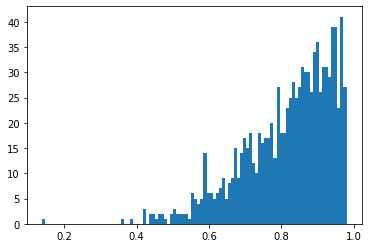

In [48]:
plt.hist(aa,bins=100)
plt.show()

## 실험

In [57]:
import statsmodels.api as sm

def ppm_build(scale = 10.0,epoch =1000):
    scores = []
    drifts = []
    
    #sample_size = false_x.shape[0] * ratio
    #aa = np.random.randint(1,sample_size,epoch)
    #perf = np.random.randint(10,int(base_score[0]*100),epoch)/100
    base = base_score[0]*100
    perf = np.random.normal(loc=base, scale=scale, size=epoch) 
    perf = np.asarray([c if c < base else base*2 - c for c in perf]) /100

    for i in range(epoch):
        #tx = true_x[np.random.choice(true_x.shape[0], sample_size, replace=True)[0:aa[i]],:]
        tx = true_x[np.random.choice(true_x.shape[0], int((perf[i] * false_x.shape[0]) /(1 - perf[i])), replace=True),:]
        fx = false_x #np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #fx = np.random.permutation(false_x)[0:np.random.randint(1,false_x.shape[0],1)[0]]
        #tx = true_x[np.random.choice(true_x.shape[0], fx.shape[0] * ratio, replace=True)[0:np.random.randint(1,fx.shape[0] * ratio,1)[0]],:]
        ffx = np.concatenate((tx,fx))
        np.random.shuffle(ffx)
        tx = ffx[:,0:81]
        ty = ffx[:,81]
        f1 = precision_recall_fscore_support(ty, ML[2010].predict(scaler.transform(tx)),average='binary')
        #x_ref2 = np.random.permutation(x_ref)[0:tx.shape[0]]
        drift = __ks_drift(x_ref,tx)
        scores.append(f1[0])
        drifts.append(np.append(drift[:,0],1))
        print(f"\r{i+1}/{epoch} precision:{f1[0]:.4f} drift:{drift[toplist[0],0]:.4f}", end="", flush=True)

    plt.hist(scores, bins = 100)
    plt.show()

    model = sm.OLS(scores, drifts).fit()
    print('Model R^2:',model.rsquared)
    #print(model.summary())
    return model

In [50]:
from sklearn.metrics import r2_score
import math

def test1(model):
    result = {}
    result['precision'] = []
    result['predicted'] = []
    window_size = 5000
    step = 2500
    predicted = 0
    batch = math.ceil((X2.shape[0]-window_size)/step)
    for i in range(batch):
        ux = X2[i*step:i*step+window_size]
        uy = Y2[i*step:i*step+window_size]
        if scaler is not None:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(scaler.transform(ux)),average='binary')
        else:
            f1 = precision_recall_fscore_support(uy, ML[2010].predict(ux),average='binary')

        drift = __ks_drift(x_ref,ux)
        precision = f1[0]
        predicted1 = model.predict(np.append(drift[:,0],1))[0]
        if abs(predicted1-predicted) > 0.1 and predicted > 0:
            predicted1 = predicted
        result['precision'].append(precision)
        result['predicted'].append(predicted1)
        print(f"\r{i+1}/{batch} precision:{precision:.4f} predicted:{predicted1:.4f}", end="", flush=True)
        predicted = predicted1

    R2 = r2_score(result['precision'],result['predicted'])
    print('')
    print('R2:',R2)
    result_df = pd.DataFrame(result)
    result_df.plot()
    plt.show()
    return R2, result_df

In [62]:
def result_visualization(Exp,scale,df3,result_data):
    for key, value in result_data.items():
        mean = np.mean(value)
        error_rate = 1.96 * np.std(value) / math.sqrt(len(result_data))
        print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

    df4 = pd.DataFrame(df3)
    colums = []
    for trial in result_data['Trial']:
        colums.append(f'predicted {trial}')

    mean_r_2 = np.mean(result_data['R2'])
    print('Mean R^2 (sum(r2)/N) :',mean_r_2)
    df4['max predicted precision'] = df4[colums].max(axis=1)
    df4['mean predicted precision'] = df4[colums].mean(axis=1)
    df4['min predicted precision'] = df4[colums].min(axis=1)

    mean_r_2 = r2_score(df4['real precision'],df4['mean predicted precision'])
    print('Mean R^2 (real,mean predict) :',mean_r_2)
    df4[['real precision','mean predicted precision']].plot(title=f'Exp:{Exp+1}, Sampling_scale:{scale}, Mean R^2:{mean_r_2:.4f}', figsize=(8,8))
    plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
    plt.show()

Exp 1, Trial 1
1000/1000 precision:0.9857 drift:0.0145

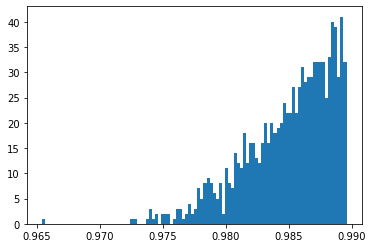

Model R^2: 0.21003803817336553
438/438 precision:0.9040 predicted:0.9617
R2: -1.454424328961613


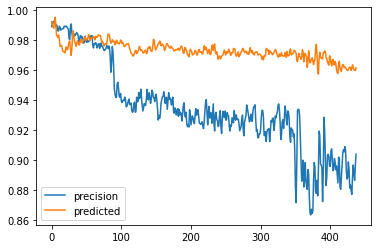

Exp 1, Trial 2
1000/1000 precision:0.9879 drift:0.0184

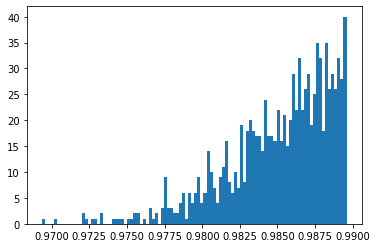

Model R^2: 0.2630261777869962
438/438 precision:0.9040 predicted:0.9532
R2: -0.901361620179356


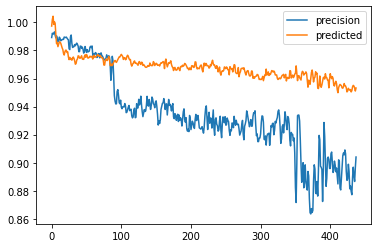

Exp 1, Trial 3
1000/1000 precision:0.9775 drift:0.0123

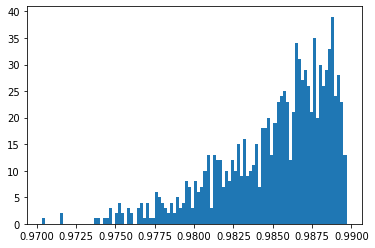

Model R^2: 0.24438741551152732
438/438 precision:0.9040 predicted:0.9646
R2: -1.977612823063526


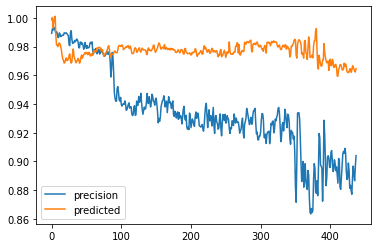

Exp 1, Trial 4
1000/1000 precision:0.9872 drift:0.0221

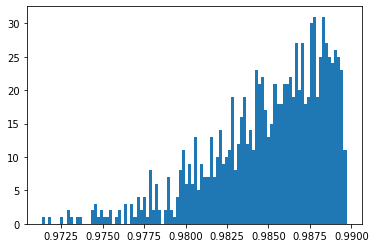

Model R^2: 0.23186231365027565
438/438 precision:0.9040 predicted:0.9773
R2: -2.8300902168072595


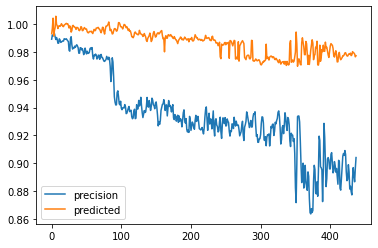

Exp 1, Trial 5
1000/1000 precision:0.9892 drift:-0.0053

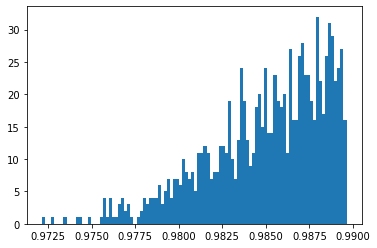

Model R^2: 0.1903302194346289
438/438 precision:0.9040 predicted:0.9718
R2: -2.029723441982049


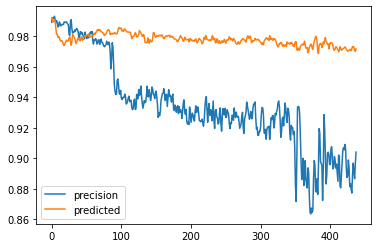

R2:-1.8386 +- 0.8906
Trial:2.0000 +- 1.9600


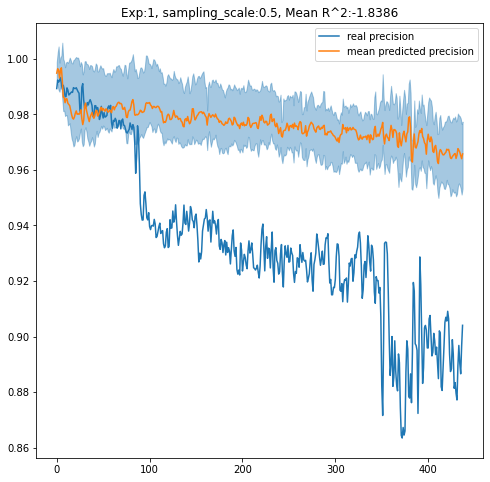

Exp 2, Trial 1
1000/1000 precision:0.9791 drift:0.0109

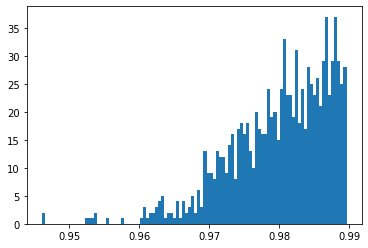

Model R^2: 0.4042842150437683
438/438 precision:0.9040 predicted:0.9575
R2: -0.6648972036019416


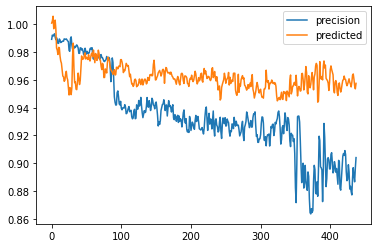

Exp 2, Trial 2
1000/1000 precision:0.9798 drift:0.0182

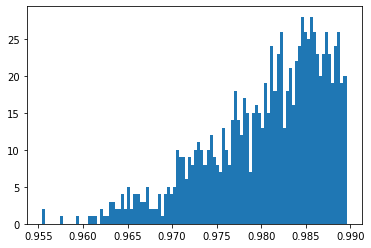

Model R^2: 0.37583516897153024
438/438 precision:0.9040 predicted:0.9399
R2: -0.17729747667003237


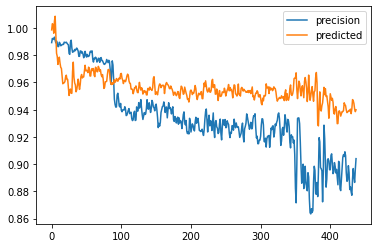

Exp 2, Trial 3
1000/1000 precision:0.9713 drift:0.0146

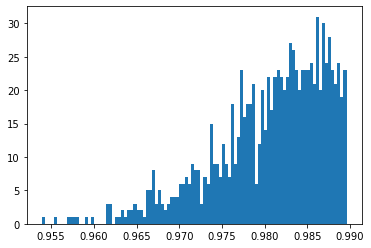

Model R^2: 0.3955233544655695
438/438 precision:0.9040 predicted:0.9428
R2: -0.27854635876234557


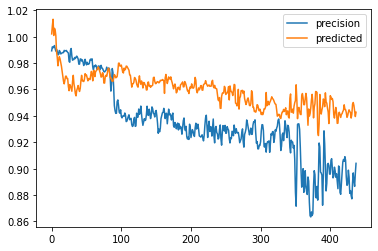

Exp 2, Trial 4
1000/1000 precision:0.9857 drift:0.0084

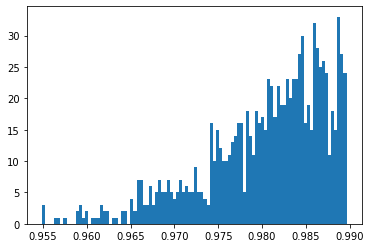

Model R^2: 0.37410085113000524
438/438 precision:0.9040 predicted:0.9236
R2: 0.15812205360880027


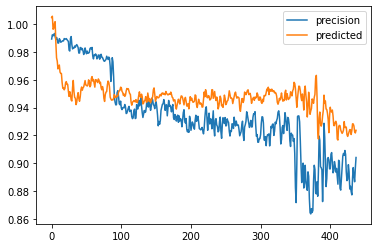

Exp 2, Trial 5
1000/1000 precision:0.9804 drift:-0.0122

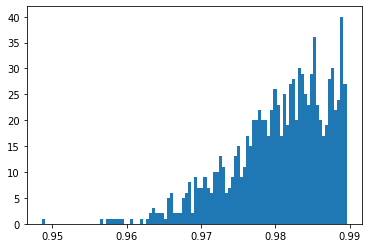

Model R^2: 0.36169974681695616
438/438 precision:0.9040 predicted:0.9437
R2: -0.19204373206120473


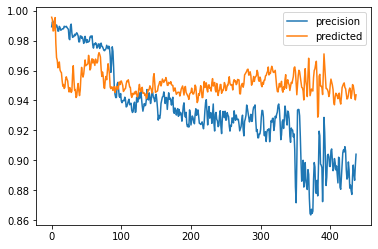

R2:-0.2309 +- 0.3648
Trial:2.0000 +- 1.9600


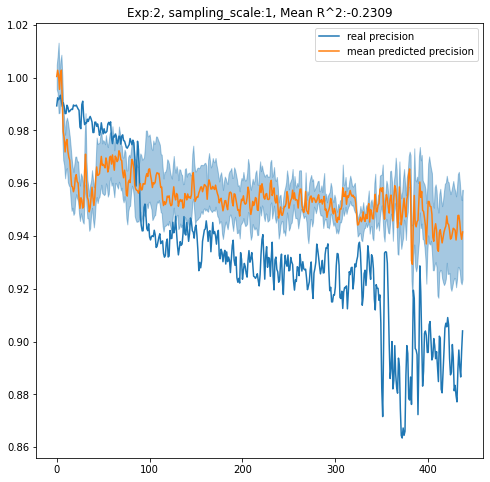

Exp 3, Trial 1
1000/1000 precision:0.9727 drift:0.0148

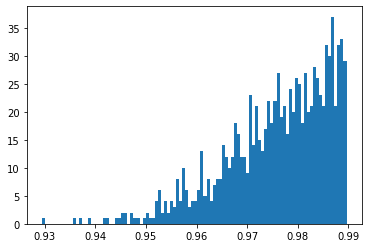

Model R^2: 0.5273941665393151
438/438 precision:0.9040 predicted:0.8980
R2: -0.03278891779860116


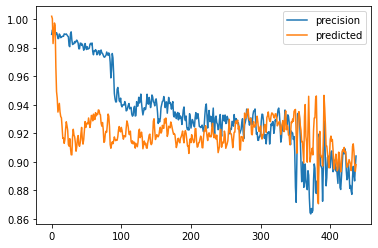

Exp 3, Trial 2
1000/1000 precision:0.9719 drift:0.0135

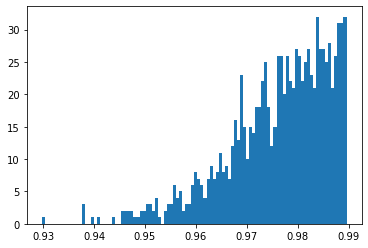

Model R^2: 0.5364210168663912
438/438 precision:0.9040 predicted:0.9304
R2: 0.05593432990028335


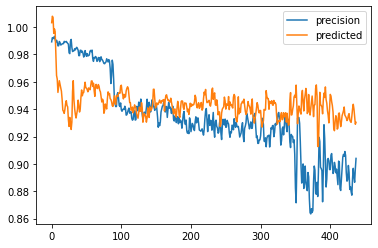

Exp 3, Trial 3
1000/1000 precision:0.9858 drift:0.0111

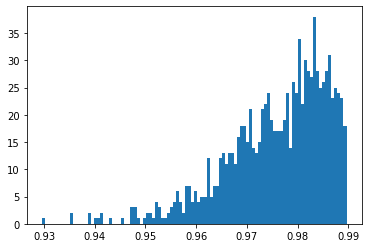

Model R^2: 0.5303274638272979
438/438 precision:0.9040 predicted:0.9234
R2: 0.20408803183164925


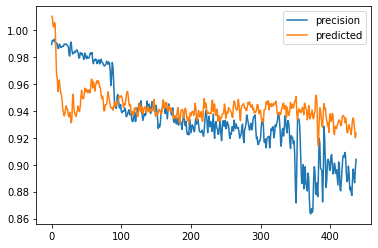

Exp 3, Trial 4
1000/1000 precision:0.9862 drift:0.0121

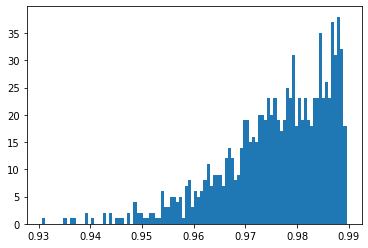

Model R^2: 0.5494801503776372
438/438 precision:0.9040 predicted:0.9171
R2: 0.48332623188713064


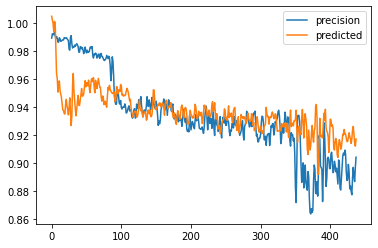

Exp 3, Trial 5
1000/1000 precision:0.9868 drift:0.0088

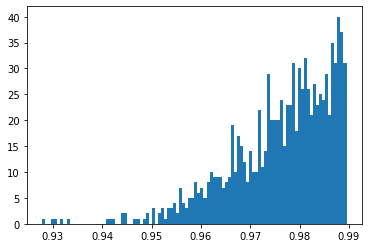

Model R^2: 0.5220747317811714
438/438 precision:0.9040 predicted:0.8950
R2: -0.02461456071737622


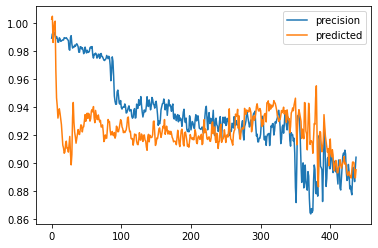

R2:0.1372 +- 0.2673
Trial:2.0000 +- 1.9600


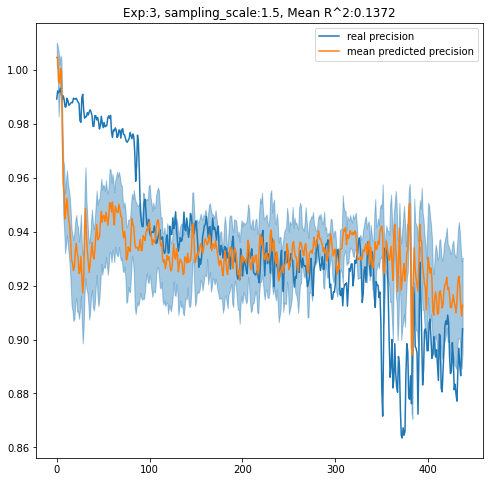

Exp 4, Trial 1
1000/1000 precision:0.9822 drift:0.0220

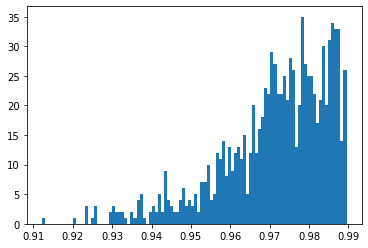

Model R^2: 0.6399188638018781
438/438 precision:0.9040 predicted:0.9265
R2: 0.44558968865191606


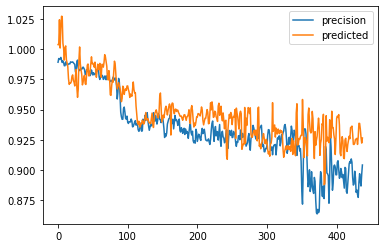

Exp 4, Trial 2
1000/1000 precision:0.9736 drift:0.0129

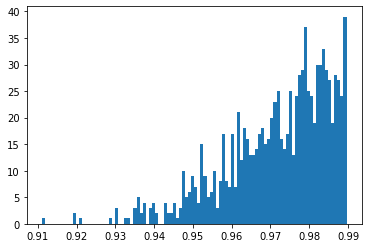

Model R^2: 0.5908999928584998
438/438 precision:0.9040 predicted:0.8869
R2: -0.7384285941234305


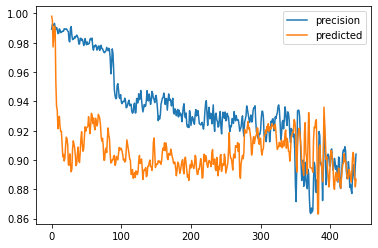

Exp 4, Trial 3
1000/1000 precision:0.9579 drift:0.0159

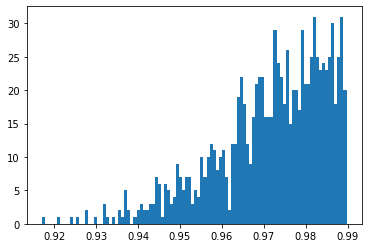

Model R^2: 0.6027874001826197
438/438 precision:0.9040 predicted:0.9005
R2: 0.05671363050530509


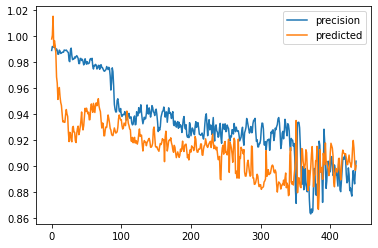

Exp 4, Trial 4
1000/1000 precision:0.9646 drift:-0.0082

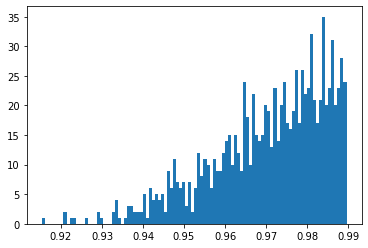

Model R^2: 0.6555615302072204
438/438 precision:0.9040 predicted:0.9019
R2: 0.49271070496078295


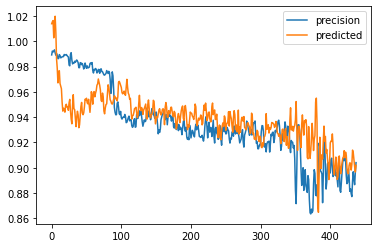

Exp 4, Trial 5
1000/1000 precision:0.9650 drift:0.0283

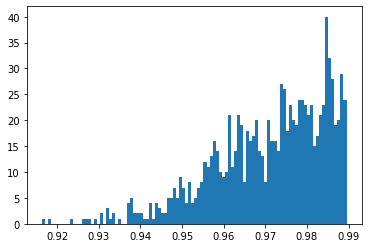

Model R^2: 0.6074574898735918
438/438 precision:0.9040 predicted:0.9277
R2: -0.2038084304457375


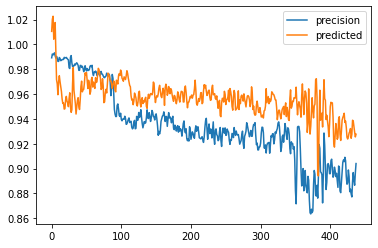

R2:0.0106 +- 0.6293
Trial:2.0000 +- 1.9600


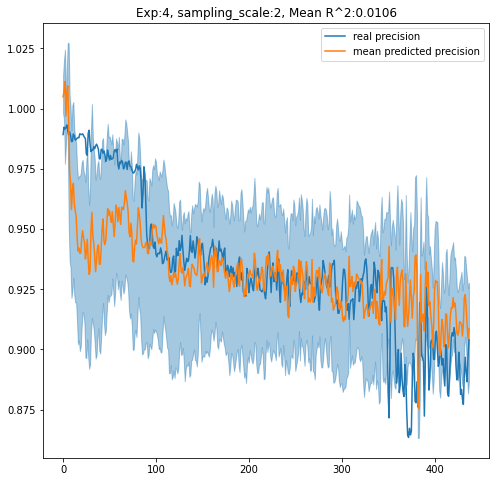

Exp 5, Trial 1
1000/1000 precision:0.9895 drift:0.0113

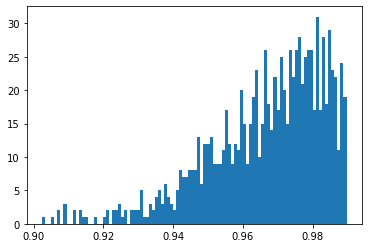

Model R^2: 0.6850296945040051
438/438 precision:0.9040 predicted:0.8942
R2: 0.37171051129455157


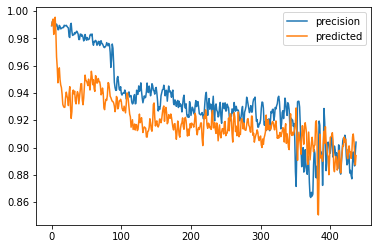

Exp 5, Trial 2
1000/1000 precision:0.9809 drift:0.0102

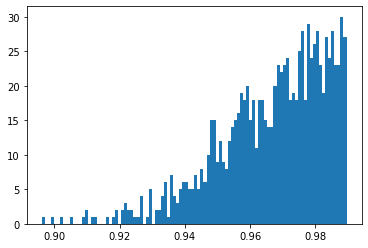

Model R^2: 0.6924770698804602
438/438 precision:0.9040 predicted:0.9334
R2: -0.0838385000354731


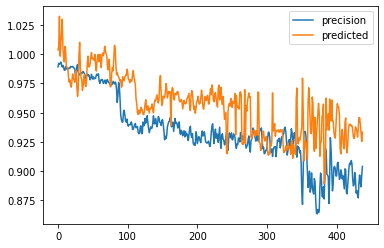

Exp 5, Trial 3
1000/1000 precision:0.9705 drift:0.0223

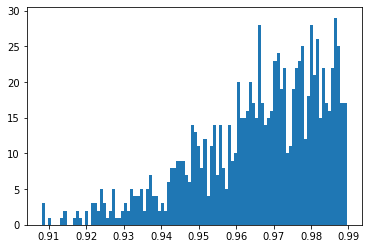

Model R^2: 0.6826270709486464
438/438 precision:0.9040 predicted:0.9482
R2: -1.4699013658656543


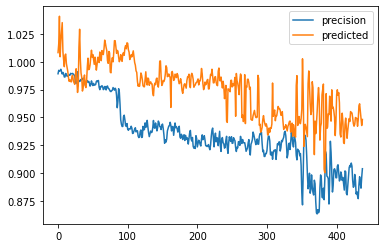

Exp 5, Trial 4
1000/1000 precision:0.9765 drift:0.0124

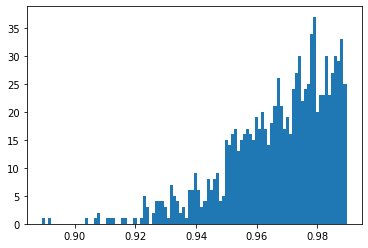

Model R^2: 0.6817013150721702
438/438 precision:0.9040 predicted:0.8913
R2: 0.3902555088463522


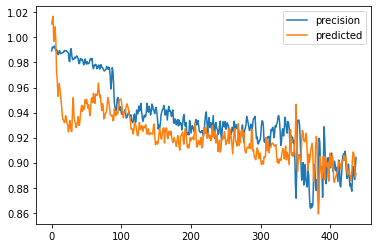

Exp 5, Trial 5
1000/1000 precision:0.9832 drift:0.0174

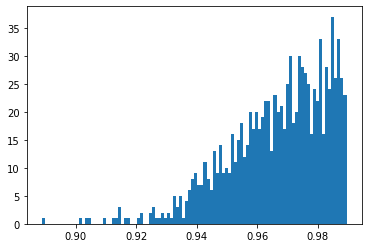

Model R^2: 0.6552699466675427
438/438 precision:0.9040 predicted:0.9104
R2: -0.27068881757471774


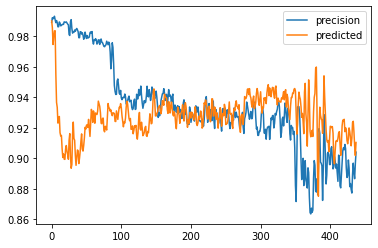

R2:-0.2125 +- 0.9411
Trial:2.0000 +- 1.9600


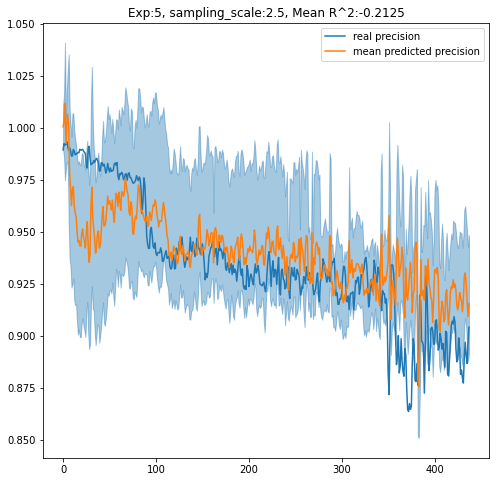

Exp 6, Trial 1
1000/1000 precision:0.9801 drift:0.0116

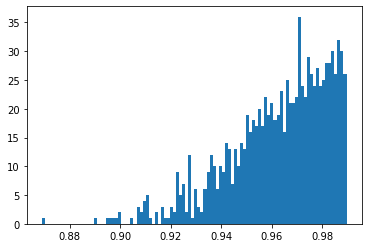

Model R^2: 0.7503372970409717
438/438 precision:0.9040 predicted:0.8820
R2: 0.06037394412620134


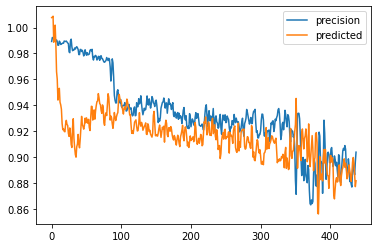

Exp 6, Trial 2
1000/1000 precision:0.9581 drift:0.0378

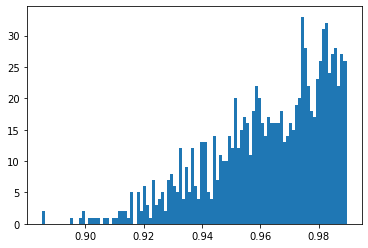

Model R^2: 0.7406484198001424
438/438 precision:0.9040 predicted:0.9188
R2: 0.4522350782510015


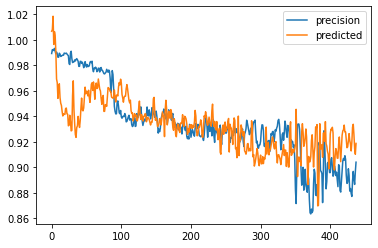

Exp 6, Trial 3
1000/1000 precision:0.9034 drift:0.0613

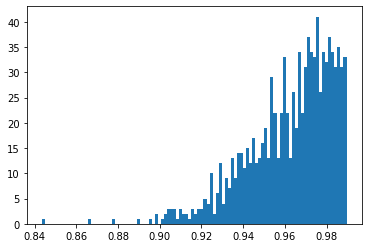

Model R^2: 0.7499282001801448
438/438 precision:0.9040 predicted:0.8979
R2: 0.17428120974452843


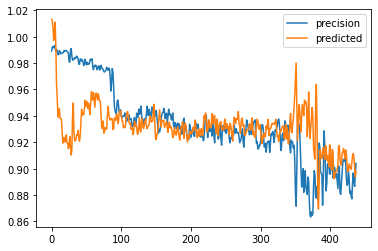

Exp 6, Trial 4
1000/1000 precision:0.9644 drift:0.0263

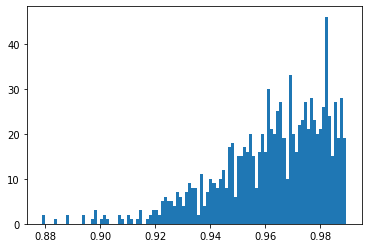

Model R^2: 0.726927252554619
438/438 precision:0.9040 predicted:0.9023
R2: 0.2011548879549776


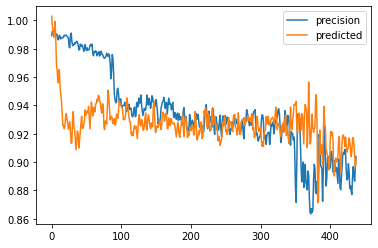

Exp 6, Trial 5
1000/1000 precision:0.9548 drift:0.0137

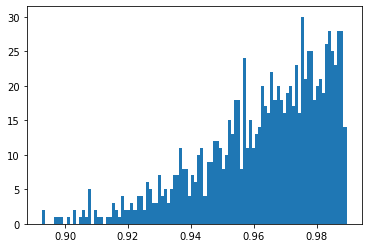

Model R^2: 0.7166884527800701
438/438 precision:0.9040 predicted:0.8846
R2: -0.42927205786560085


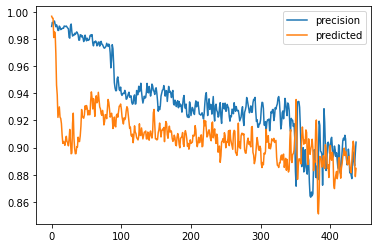

R2:0.0918 +- 0.4022
Trial:2.0000 +- 1.9600


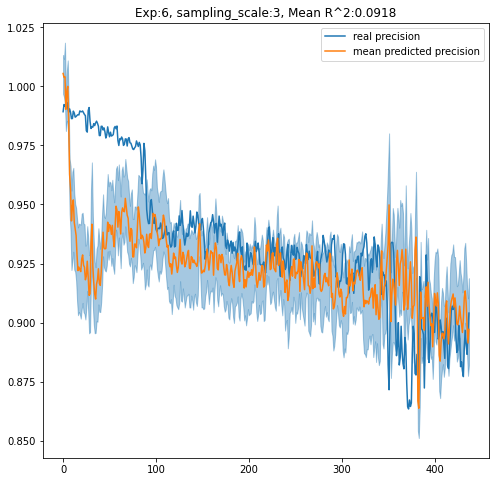

Exp 7, Trial 1
1000/1000 precision:0.9707 drift:0.0191

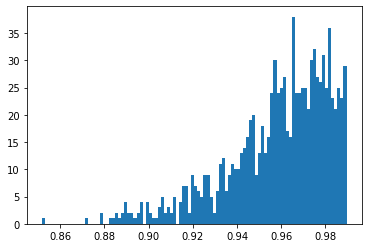

Model R^2: 0.7806265105764048
438/438 precision:0.9040 predicted:0.8823
R2: -0.09855433486948262


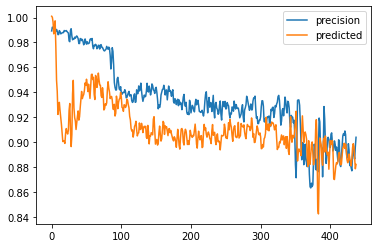

Exp 7, Trial 2
1000/1000 precision:0.9051 drift:0.0459

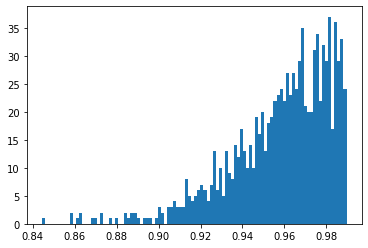

Model R^2: 0.8043953789039241
438/438 precision:0.9040 predicted:0.8760
R2: -1.1444720645936255


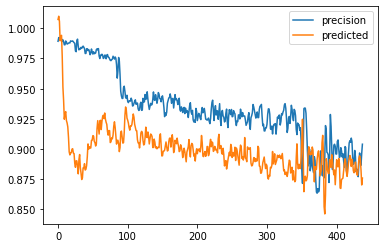

Exp 7, Trial 3
1000/1000 precision:0.9809 drift:0.0084

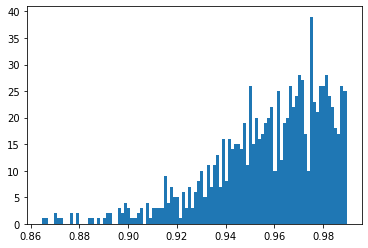

Model R^2: 0.7760578620795056
438/438 precision:0.9040 predicted:0.8921
R2: -0.019706603159248326


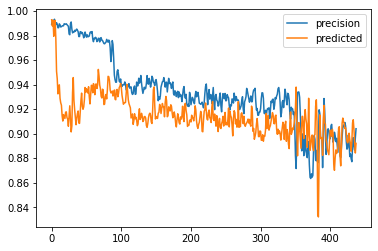

Exp 7, Trial 4
1000/1000 precision:0.9510 drift:0.0247

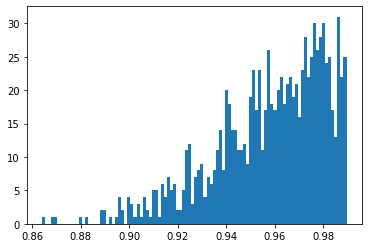

Model R^2: 0.7890853152243154
438/438 precision:0.9040 predicted:0.9367
R2: -0.046189519320377403


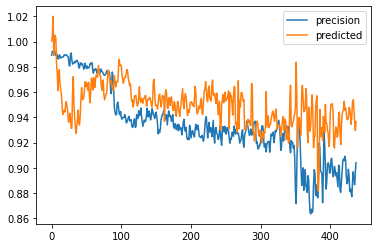

Exp 7, Trial 5
1000/1000 precision:0.9728 drift:0.0247

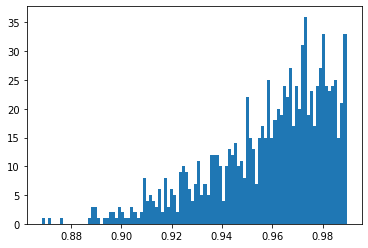

Model R^2: 0.7776317615229114
438/438 precision:0.9040 predicted:0.8564
R2: -0.6258990428472664


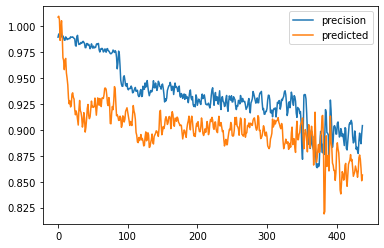

R2:-0.3870 +- 0.6089
Trial:2.0000 +- 1.9600


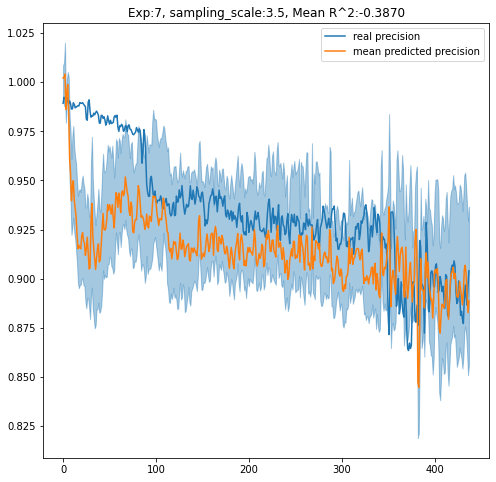

Exp 8, Trial 1
1000/1000 precision:0.9552 drift:0.0151

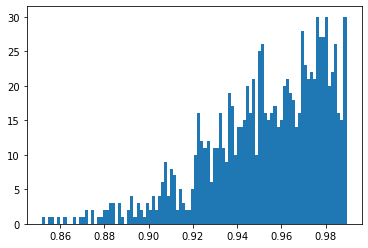

Model R^2: 0.8091699061110319
438/438 precision:0.9040 predicted:0.8629
R2: -1.9246837439695903


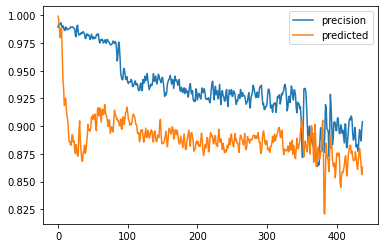

Exp 8, Trial 2
1000/1000 precision:0.8733 drift:0.0873

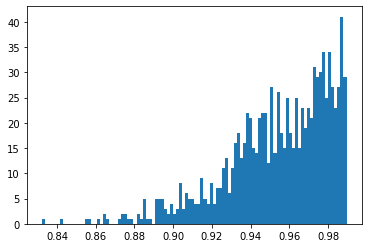

Model R^2: 0.8129280718315943
438/438 precision:0.9040 predicted:0.9042
R2: -0.07323194059776239


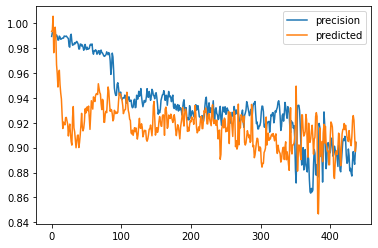

Exp 8, Trial 3
1000/1000 precision:0.8939 drift:0.0641

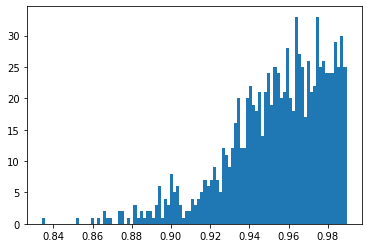

Model R^2: 0.824927437623723
438/438 precision:0.9040 predicted:0.9004
R2: 0.5826633582441217


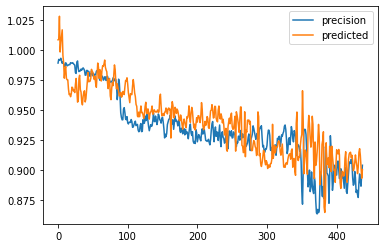

Exp 8, Trial 4
1000/1000 precision:0.9849 drift:0.0123

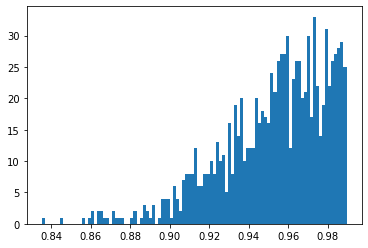

Model R^2: 0.8169018592421952
438/438 precision:0.9040 predicted:0.9138
R2: 0.33015515022896713


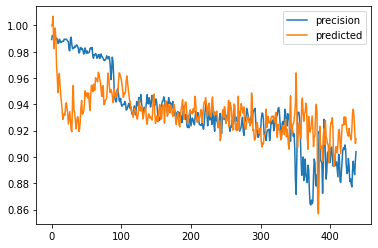

Exp 8, Trial 5
1000/1000 precision:0.9792 drift:0.0168

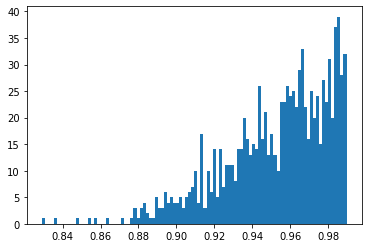

Model R^2: 0.8159115068929372
438/438 precision:0.9040 predicted:0.8663
R2: -2.5165675274265875


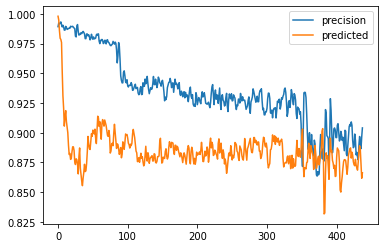

R2:-0.7203 +- 1.7418
Trial:2.0000 +- 1.9600


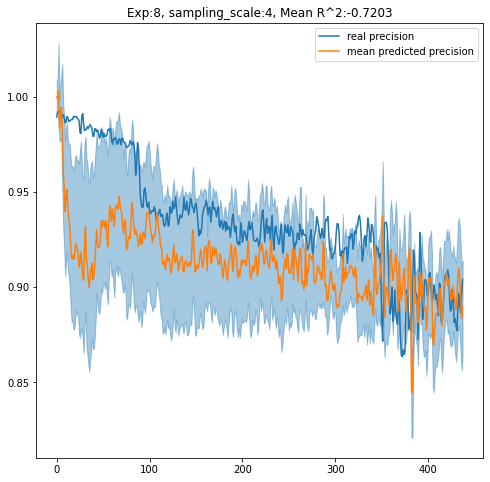

Exp 9, Trial 1
1000/1000 precision:0.9332 drift:0.0327

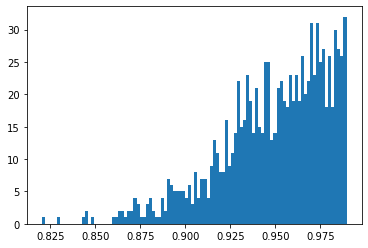

Model R^2: 0.8379357051814501
438/438 precision:0.9040 predicted:0.8680
R2: -0.7683376903402026


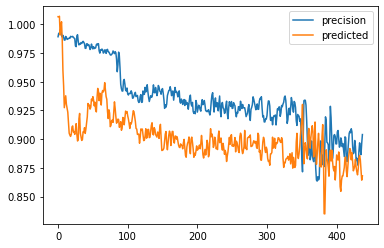

Exp 9, Trial 2
1000/1000 precision:0.9520 drift:0.0150

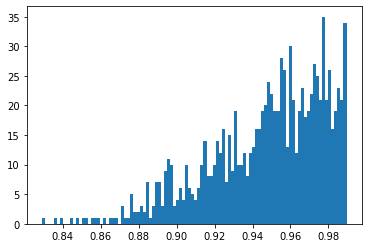

Model R^2: 0.8531943193962934
438/438 precision:0.9040 predicted:0.8619
R2: -1.8321674564698505


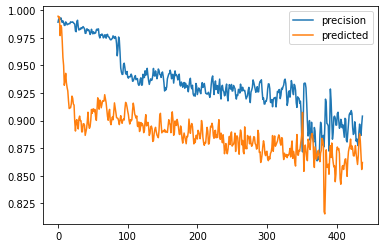

Exp 9, Trial 3
1000/1000 precision:0.9749 drift:-0.0196

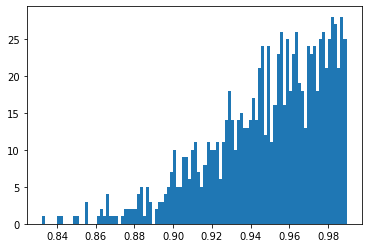

Model R^2: 0.8456992667993812
438/438 precision:0.9040 predicted:0.9034
R2: 0.512078995865644


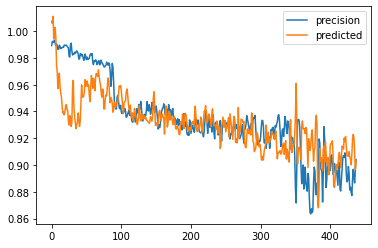

Exp 9, Trial 4
1000/1000 precision:0.9243 drift:0.0546

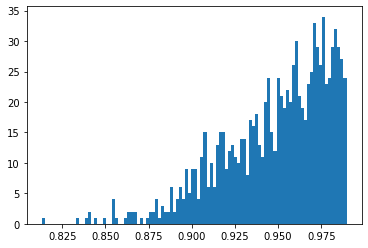

Model R^2: 0.854625964937751
438/438 precision:0.9040 predicted:0.8884
R2: -0.8621324486171325


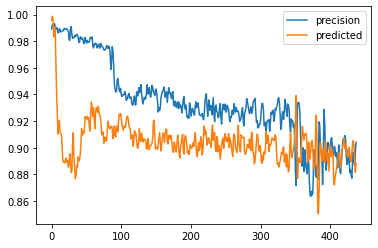

Exp 9, Trial 5
1000/1000 precision:0.9057 drift:0.0748

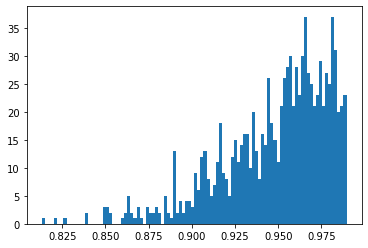

Model R^2: 0.8541950945901176
438/438 precision:0.9040 predicted:0.8802
R2: -2.171954178731467


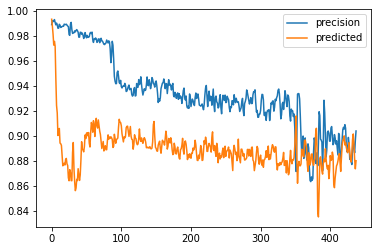

R2:-1.0245 +- 1.3034
Trial:2.0000 +- 1.9600


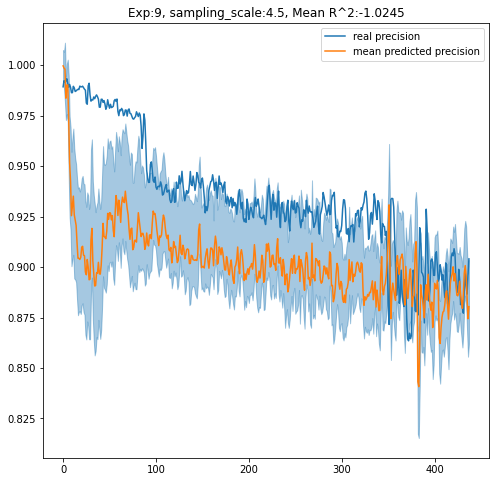

Exp 10, Trial 1
1000/1000 precision:0.9770 drift:0.0176

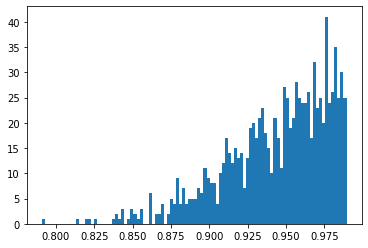

Model R^2: 0.8699402176723735
438/438 precision:0.9040 predicted:0.8890
R2: -0.13129670488662004


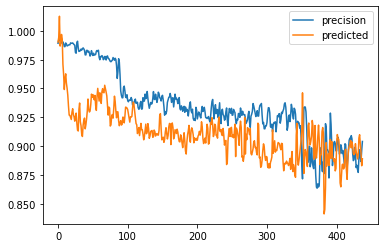

Exp 10, Trial 2
1000/1000 precision:0.8586 drift:0.1023

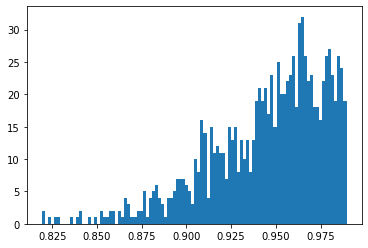

Model R^2: 0.8604482407039334
438/438 precision:0.9040 predicted:0.9028
R2: -0.4885269025453336


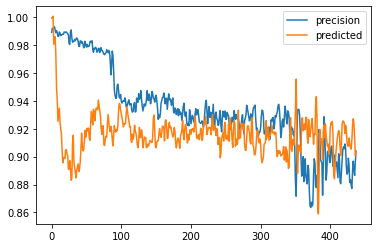

Exp 10, Trial 3
1000/1000 precision:0.9021 drift:0.0376

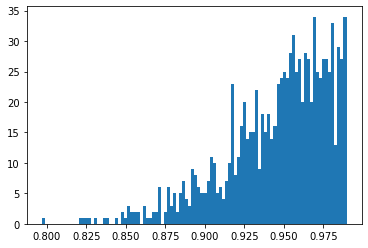

Model R^2: 0.8779218615276491
438/438 precision:0.9040 predicted:0.8854
R2: -0.539193566375868


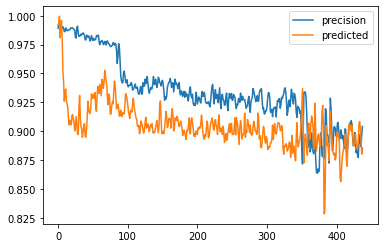

Exp 10, Trial 4
1000/1000 precision:0.9880 drift:0.0149

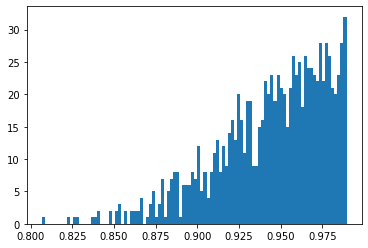

Model R^2: 0.861656968893975
438/438 precision:0.9040 predicted:0.8794
R2: -1.3370976948225146


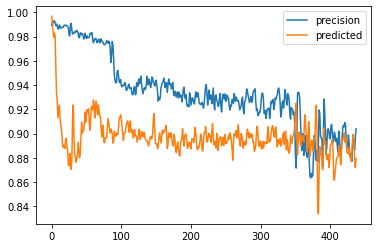

Exp 10, Trial 5
1000/1000 precision:0.9672 drift:0.0231

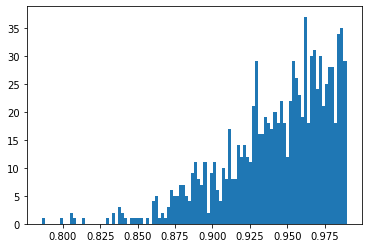

Model R^2: 0.8589845612745894
438/438 precision:0.9040 predicted:0.8622
R2: -1.6012350288865584


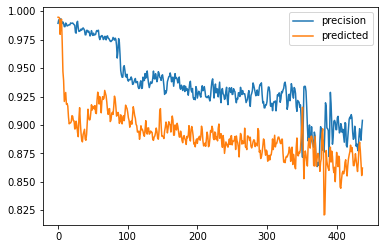

R2:-0.8195 +- 0.7693
Trial:2.0000 +- 1.9600


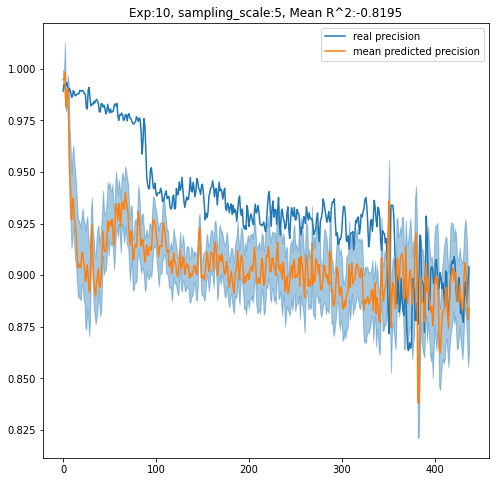

In [61]:
seed_everything()

scales = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for Exp in range(len(scales)):
    df3 = {}
    result_data = {}
    result_data['R2'] = []
    result_data['Trial'] = []
    #result_dfs = []
    experimant_count = 5
    scale = scales[Exp]
    for trial in range(experimant_count):
        print(f'Exp {Exp+1}, Trial {trial+1}')
        model = ppm_build(scale = scale,epoch =1000)
        R2, result_df = test1(model)
        #if R2 > -10.0:
        result_data['R2'].append(R2)
        result_data['Trial'].append(trial)
        df3['real precision'] = result_df['precision'].values
        df3[f'predicted {trial}'] = result_df['predicted'].values
        #else:
        #    print('==== Discard this experiment.====')

    result_visualization(Exp,scale,df3,result_data)

In [136]:
#R2:-1.5451 +- 0.8283

In [ ]:
# -1.2306324299418536

# 8. Credit card transactions 실험


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


## 데이터 구축

In [ ]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 261M/263M [00:02<00:00, 102MB/s]
100% 263M/263M [00:02<00:00, 129MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

### 데이터 정체 (1/30 로 축소)

In [ ]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_everything()

In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


### 기타 등등 전처리

In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827624
False     14037
Name: Errors?, dtype: int64

In [ ]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [ ]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [ ]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [ ]:
df = df.sort_values(['Year','Month','Day'])

In [ ]:
df.Year.value_counts()

2016    60726
2018    60155
2015    59749
2019    59311
2017    57298
2014    56896
2013    56777
2012    55201
2010    53148
2011    52492
2009    46303
2008    44533
2007    37301
2006    31605
2005    25058
2004    20495
2003    15674
2002    11824
2020    11342
2001     9012
2000     6057
1999     3811
1998     2641
1997     1679
1996      920
1995      683
1994      461
1993      285
1992      159
1991       65
Name: Year, dtype: int64

### dataset 만들기

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 19831724 to 16154702
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37301 non-null  int64  
 1   Amount      37301 non-null  float64
 2   Use Chip    37301 non-null  int64  
 3   MCC         37301 non-null  int64  
 4   is online   37301 non-null  int64  
 5   Hour        37301 non-null  int64  
 6   is vozmes   37301 non-null  int64  
 7   abs_amount  37301 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [ ]:
X.shape

(37301, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_ref.shape[0] + x_inf.shape[0]

37301

## 예측모델 구축

### Catboost 모델 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


### Credit card fraud transaction detect model build

In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041487
0:	learn: 0.6216151	total: 53.9ms	remaining: 53.9s
1:	learn: 0.5551103	total: 61.6ms	remaining: 30.7s
2:	learn: 0.4986417	total: 68.9ms	remaining: 22.9s
3:	learn: 0.4565464	total: 76.6ms	remaining: 19.1s
4:	learn: 0.4136850	total: 88.1ms	remaining: 17.5s
5:	learn: 0.3820252	total: 94.2ms	remaining: 15.6s
6:	learn: 0.3484819	total: 100ms	remaining: 14.2s
7:	learn: 0.3184745	total: 110ms	remaining: 13.6s
8:	learn: 0.2939070	total: 122ms	remaining: 13.4s
9:	learn: 0.2715727	total: 136ms	remaining: 13.5s
10:	learn: 0.2529872	total: 146ms	remaining: 13.1s
11:	learn: 0.2348952	total: 154ms	remaining: 12.7s
12:	learn: 0.2241845	total: 165ms	remaining: 12.5s
13:	learn: 0.2115322	total: 179ms	remaining: 12.6s
14:	learn: 0.2029825	total: 188ms	remaining: 12.3s
15:	learn: 0.1922771	total: 214ms	remaining: 13.1s
16:	learn: 0.1826835	total: 221ms	remaining: 12.8s
17:	learn: 0.1743241	total: 228ms	remaining: 12.4s
18:	learn: 0.1673404	total: 236ms	remaining: 12.2s
19:	l

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6974789915966385
0.7759890977827133


## Credit card fraud transaction detect model 성능 예측 실험

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10294
           1       0.94      0.56      0.70       897

    accuracy                           0.96     11191
   macro avg       0.95      0.78      0.84     11191
weighted avg       0.96      0.96      0.96     11191



In [ ]:
base_score

(0.9378531073446328, 0.5551839464882943, 0.6974789915966385, None)

In [ ]:

print("trainset:",X.shape)
print("online dataset:",X_test2.shape)

trainset: (37301, 8)
online dataset: (90836, 8)


In [ ]:
COLUMNS = X.columns

In [ ]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [ ]:
importances = cat.feature_importances_

### Error chart

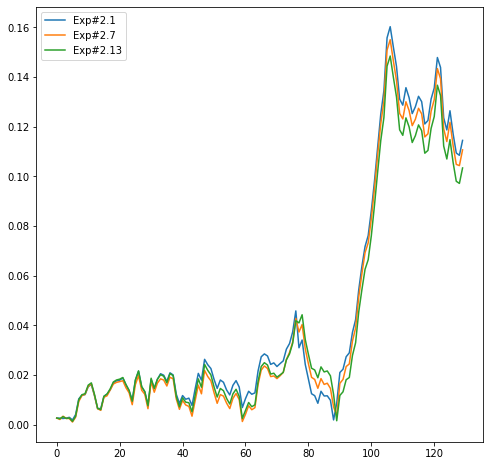

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#2.1','Exp#2.7','Exp#2.13']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))